In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
D1=pd.read_csv('Data.csv')





In [25]:
#question1(a):
PM = D1.groupby("state")['PM2.5'].mean()
statemax = PM.idxmax()
maxvalue = PM.max()
print(f"max {maxvalue:.2f} in {statemax}")



max 104.10 in Delhi


In [26]:
#question1(b):
D1["Timestamp"] = pd.to_datetime(D1["Timestamp"], format="%Y-%m-%d")
D1["Year"] = D1["Timestamp"].dt.year

D123 = D1[D1["Year"] == 2023]
haz = D123[D123["PM2.5"] > 300].groupby("state")["Timestamp"].nunique()
maxstate= haz.idxmax()
maxnum = haz.max()

print(f"{maxstate} state with {maxnum} days.")

Delhi state with 49 days.


In [27]:
#question1(c):
D1["Timestamp"] = pd.to_datetime(D1["Timestamp"], format="%Y-%m-%d")
D1["Year"] = D1["Timestamp"].dt.year

D123 = D1[D1["Year"] == 2023]
var = D123.groupby("state")["PM2.5"].std()
maxstate = var.idxmax()
maxvar = var.max()
print(f"{maxvar:.2f} variability in {maxstate}")

82.80 variability in Delhi


In [28]:
#question1(d):
D1['Timestamp']=pd.to_datetime(D1['Timestamp'], format='%Y-%m-%d')
D1['year'] = D1['Timestamp'].dt.year
D101 = D1[(D1['year']>=2020) & (D1['year']<=2021)]
Min = D101.groupby("state")["PM2.5"].mean()
minstate = Min.idxmin()
minvalue = Min.min()
print(f"min {minvalue:.2f} in {minstate}")

min 14.32 in Mizoram


In [29]:
#question2(a):
D1['Timestamp']=pd.to_datetime(D1['Timestamp'], format='%Y-%m-%d')
D1['year'] = D1['Timestamp'].dt.year
D1['month'] = D1['Timestamp'].dt.month
D120 = D1[(D1['year']==2020) & (D1['month']==8)]
Max = D120.groupby('station')['PM2.5'].max()
maxstation = Max.idxmax()
maxvalue = Max.max()
print(f"max {maxvalue:.2f} in {maxstation}")

max 805.51 in Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


In [30]:
#question2(b):
D1['Timestamp']=pd.to_datetime(D1['Timestamp'], format='%Y-%m-%d')
D1['year'] = D1['Timestamp'].dt.year
D1['month'] = D1['Timestamp'].dt.month
Da = D1[(D1['year']==2018) & ((D1['month']==12) | (D1['month']==1) | (D1['month']==2))]
Db = D1[(D1['year']==2018) & (D1['month'].between(3,5))]
Dc = D1[(D1['year']==2018) & (D1['month'].between(6,9))]

Mean1 = Da[Da['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']['PM2.5'].mean()
Mean2 = Db[Db['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']['PM2.5'].mean()
Mean3 = Dc[Dc['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']['PM2.5'].mean()
display(Mean1)
display(Mean2)
display(Mean3)
dicti = {'winter': Mean1, 'summer':Mean2, 'monsoon':Mean3}
pol = max(dicti, key=dicti.get)
print(f"Highest is {pol}")
#Cold tempreture in winter traps the pollutants, higher photochemical reactions during summer.

np.float64(67.4923443634478)

nan

np.float64(34.42519611317571)

Highest is winter


C:\Users\yashs\AppData\Local\Temp\ipykernel_8272\593288231.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D121['whichday'] = D121['dayofweek']>=5


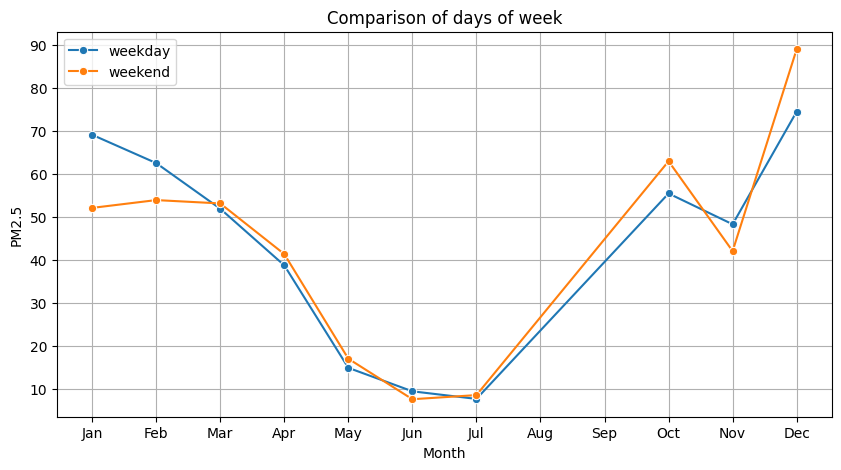

In [31]:
#question2(c)
D1['Timestamp']=pd.to_datetime(D1['Timestamp'], format='%Y-%m-%d')
D1['year'] = D1['Timestamp'].dt.year
D1['month'] = D1['Timestamp'].dt.month
D1['dayofweek'] = D1['Timestamp'].dt.dayofweek
D121 = D1[(D1['year']==2021) & (D1['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')]

D121['whichday'] = D121['dayofweek']>=5
avg = D121.groupby(['month', 'whichday'])['PM2.5'].mean().reset_index()
avg['whichday']= avg['whichday'].replace({True: 'weekend', False: 'weekday'})
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='PM2.5', hue='whichday', data=avg, marker='o')
plt.xticks(range(1,13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Comparison of days of week')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
#question3(a)
D1['Timestamp']=pd.to_datetime(D1['Timestamp'], format='%Y-%m-%d')
D1['year'] = D1['Timestamp'].dt.year
D1['month'] = D1['Timestamp'].dt.month
D122= D1[D1['year']==2022]
summer = D122[D122['month'].between(3,5)]
monsoon = D122[D122['month'].between(6,9)]
avg1 = summer.groupby('state')['PM2.5'].mean()
avg2 = monsoon.groupby('state')['PM2.5'].mean()
per = ((avg1-avg2)/avg2)*100
state = per.abs().idxmax()
value = per[state]
print(f"max {value:.2f} in {state}")

max 157.58 in Assam


Text(0.5, 1.0, 'PM2.5 in Delhi')

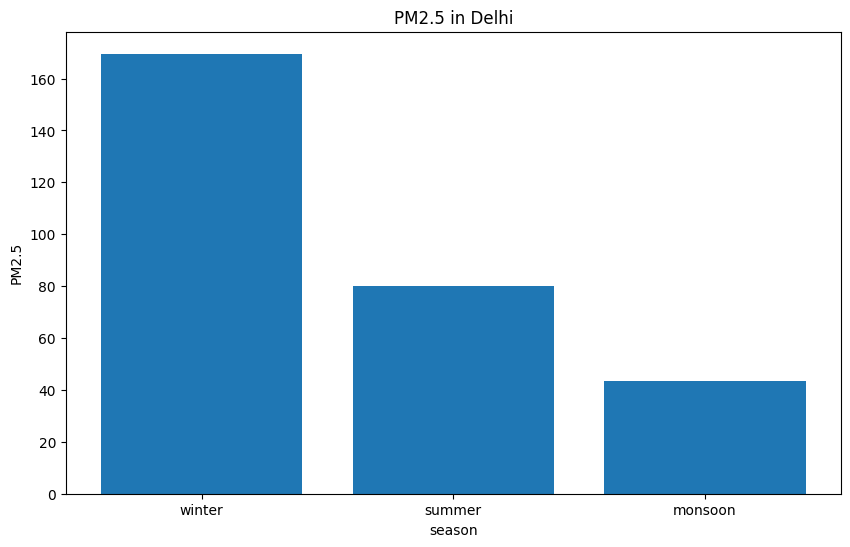

In [33]:
#question3(b)
D1['Timestamp']=pd.to_datetime(D1['Timestamp'], format='%Y-%m-%d')
D1['year'] = D1['Timestamp'].dt.year
D1['month'] = D1['Timestamp'].dt.month
D1bt = D1[D1['year'].between(2017, 2023)& (D1['state']=='Delhi')]
winter = D1bt[(D1bt['month']==12)|(D1bt['month']==1)|(D1bt['month']==2)]
summer = D1bt[D1bt['month'].between(3,5)]
monsoon = D1bt[D1bt['month'].between(6,9)]
avg1 = winter['PM2.5'].mean()
avg2 = summer['PM2.5'].mean()
avg3 = monsoon['PM2.5'].mean()
plt.figure(figsize=(10,6))
dict1 = {'winter':avg1, 'summer':avg2, 'monsoon':avg3}
plt.bar(dict1.keys(), dict1.values())
plt.xlabel('season')
plt.ylabel('PM2.5')
plt.title('PM2.5 in Delhi')
#Here we can observe the seasonal variation. Pollution levels in winter is higher and is decreases with the season.

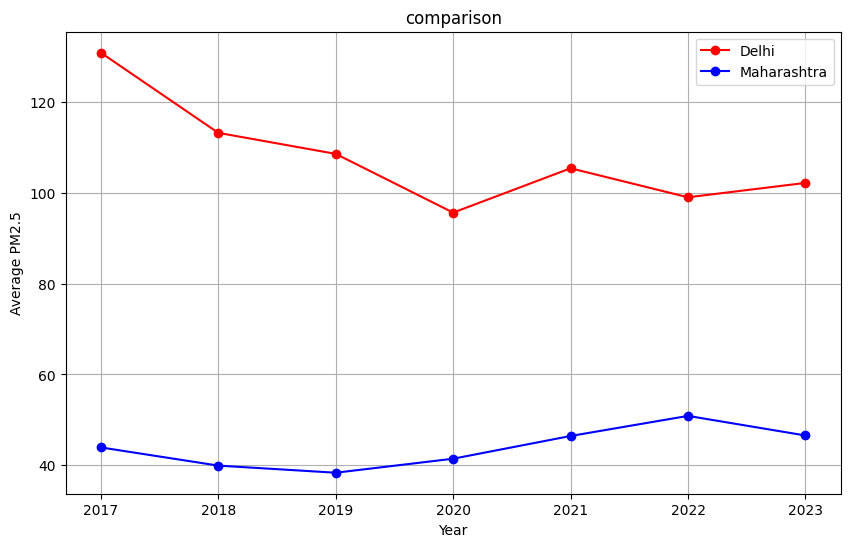

In [34]:
#question3(c)
D1['Timestamp']=pd.to_datetime(D1['Timestamp'], format='%Y-%m-%d')
D1['year'] = D1['Timestamp'].dt.year
D1['month'] = D1['Timestamp'].dt.month
D1bt = D1[D1['year'].between(2015, 2023)& (D1['state']=='Delhi')]
D1at = D1[D1['year'].between(2015, 2023)& (D1['state']=='Maharashtra')]
A1 = D1bt.groupby('year')['PM2.5'].mean()
A2 = D1at.groupby('year')['PM2.5'].mean()
plt.figure(figsize=(10,6))
plt.plot(A1.index, A1.values, label='Delhi', color= 'r', marker = 'o')
plt.plot(A2.index, A2.values, label='Maharashtra', color= 'b', marker = 'o')
plt.xlabel('Year')
plt.ylabel('Average PM2.5')
plt.title('comparison')
plt.grid(True)
plt.legend()
#Delhi has more fluctuations.


In [35]:
#4.1
#to find the largest number of monitoring units relative to population.
#first we have loaded both csv files.
#we will approach this method by counting the monitoring stations and taking the ratio of number of stations relative to population to 
#find the highest ratio for a million people.
#the reference will be a million people.
#the column names were not matching and it was raising key error so we stripped with spaces and kept it lowercase for both.
#and then grouping by the states and merging it with the population data
#the reference is taken to  be for million people 
#use .loc and .idxmax() to find the state with highest ratio.


df_stations = pd.read_csv("Data.csv")         
df_population = pd.read_csv("State_data.csv") 

df_stations.columns = df_stations.columns.str.strip().str.lower()
df_population.columns = df_population.columns.str.strip().str.lower()

stations_per_state = df_stations.groupby("state").size().reset_index(name="station_count")

merged_df = pd.merge(stations_per_state, df_population, on="state", how="inner")

merged_df["stations_per_million"] = (merged_df["station_count"] / merged_df["population"]) * 1_000_000

max_state = merged_df.loc[merged_df["stations_per_million"].idxmax()]

#return the state with highest ratio.

display(max_state[["state", "stations_per_million"]])
display(merged_df)



state                    Chandigarh
stations_per_million    8245.771946
Name: 4, dtype: object

,state,station_count,population,area (km2),stations_per_million
0,Andhra Pradesh,35157,49577103,162975,709.137845
1,Arunachal Pradesh,2901,1383727,83743,2096.511812
2,Assam,26109,31205576,78438,836.677394
3,Bihar,98979,104099452,94163,950.811922
4,Chandigarh,8703,1055450,114,8245.771946
5,Chhattisgarh,40614,25545198,135192,1589.887853
6,Delhi,115695,16787941,1484,6891.553884
7,Gujarat,49317,60439692,196024,815.970406
8,Haryana,87030,25351462,44212,3432.938108
9,Himachal Pradesh,2901,6864602,55673,422.602796


,state,avg_pm2.5,population,area (km2),pm2.5_per_capita
4,Chandigarh,59.414055,1055450,114,0.000056
24,Sikkim,14.927530,610577,7096,0.000024
27,Tripura,80.469872,3673917,10491,0.000022
21,Puducherry,24.286078,1247953,479,0.000019
19,Nagaland,32.721157,1978502,16579,0.000017


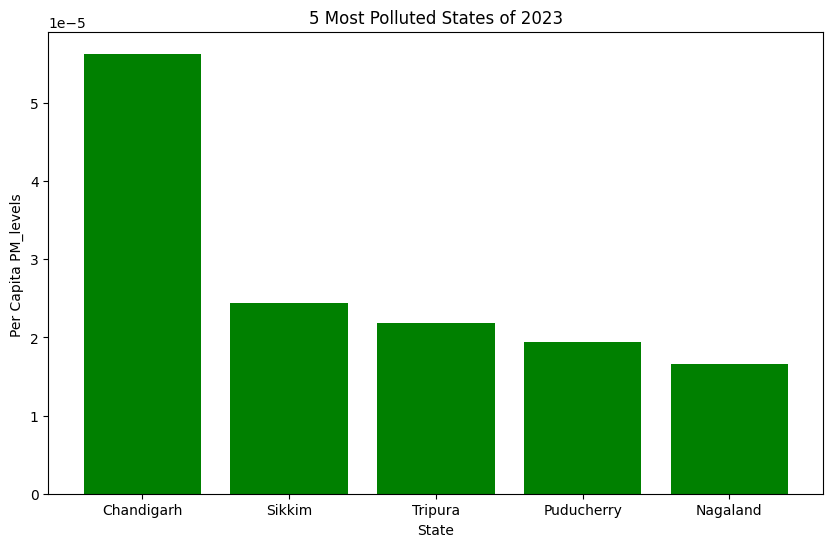

In [36]:
#4.2
#Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

#here the timestamp column in the csv file is stored as string to filter data for 2023 we need it in
#in  date time format,practically it will just change text to datetime(datetime64[ns]).so we will only have the rows where year is 2023.
#get values only for the year 2023
#Grouping by state and pm2.5 levels and making a new dataframe
#Merging it with the population data
#percapita pm level is pm 2.5 levels divided by the population 
#printing the top 5 most polluted states
#plot the chart 

df_stations["timestamp"] = pd.to_datetime(df_stations["timestamp"])

df_2023 = df_stations[df_stations["timestamp"].dt.year == 2023]

pm25_per_state = df_2023.groupby("state")["pm2.5"].mean().reset_index(name="avg_pm2.5")

pollution_data = pd.merge(pm25_per_state, df_population, on="state", how="inner")

pollution_data["pm2.5_per_capita"] = pollution_data["avg_pm2.5"] / pollution_data["population"]
top_5_polluted = pollution_data.nlargest(5, "pm2.5_per_capita")
display(top_5_polluted)
plt.figure(figsize=(10, 6))
plt.bar(top_5_polluted["state"], top_5_polluted["pm2.5_per_capita"], color='green')
plt.xlabel("State")
plt.ylabel("Per Capita PM_levels ")
plt.title("5 Most Polluted States of 2023")

plt.show()


3.3
Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.


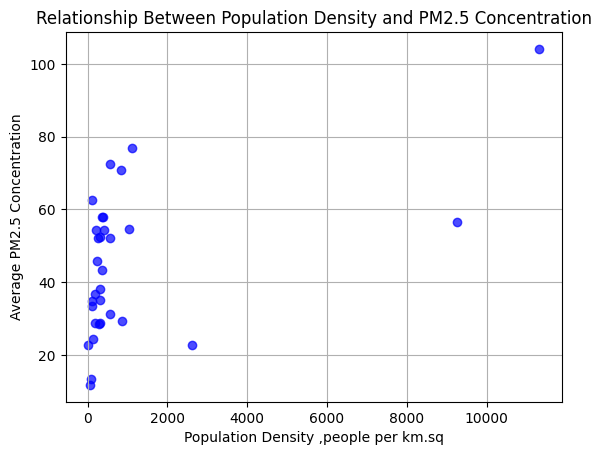

In [37]:
#4.3
#converted all column names to lowercase due to mismatch.
df_stations.columns = df_stations.columns.str.lower()
df_population.columns = df_population.columns.str.lower()

#population density is defined as the population per km2 area.
df_population["population_density"] = df_population["population"] / df_population["area (km2)"]

#grouping by the state and pm2.5 levels and creating a new dataframe.
#we merged datasets on the column state.

#now create the scatter plot.
#the x axis is set as population density column and y axis is set to be the avg pm level column of the dataset.
#give the suitable labels to x and y axis.
#show the grid to have a better idea.
pm25_per_state = df_stations.groupby("state")["pm2.5"].mean().reset_index(name="avg_pm2.5")

pollution_density_data = pd.merge(pm25_per_state, df_population, on="state", how="inner")


plt.scatter(pollution_density_data["population_density"], 
            pollution_density_data["avg_pm2.5"], 
            color="blue", alpha=0.7)
plt.xlabel("Population Density ,people per km.sq")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Relationship Between Population Density and PM2.5 Concentration")

plt.grid(True)
plt.show()


5.1
Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


Delhi


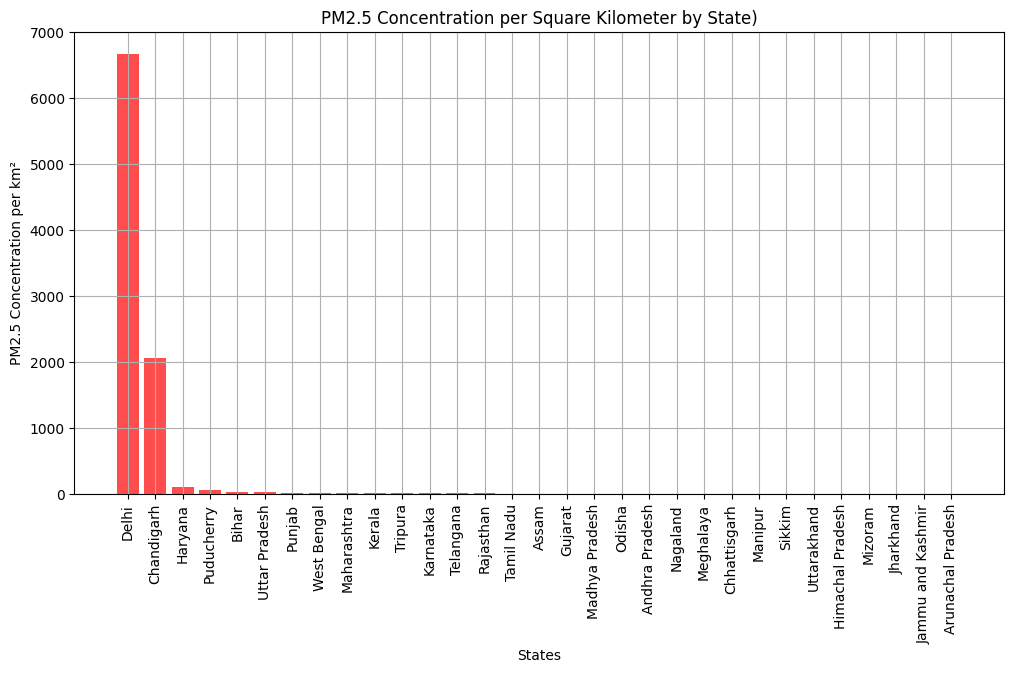

In [38]:
#calculating the total pm2.5 levels (summing using .sum())
#5.1
#merging with the names of states on inner method

#average pm level should be defined as the toal pm level divided by the area in km2.
#this will return the state and value of highest pm level concentraiton.
#sorting the values.
#also returned the most polluted state with highest pm level using idmax()
df_stations = pd.read_csv("Data.csv")
df_population = pd.read_csv("State_data.csv")

#this has to be done everytime as it raises key error everytime due to different column names.
df_stations.columns = df_stations.columns.str.lower()
df_population.columns = df_population.columns.str.lower()

total_pm25_per_state = df_stations.groupby("state")["pm2.5"].sum().reset_index(name="total_pm2.5")
pm25_area_data = pd.merge(total_pm25_per_state, df_population, on="state", how="inner")
pm25_area_data["pm2.5_per_km2"] = pm25_area_data["total_pm2.5"] / pm25_area_data["area (km2)"]

most_polluted_state = pm25_area_data.loc[pm25_area_data["pm2.5_per_km2"].idxmax(), "state"]

pm25_area_data = pm25_area_data.sort_values(by="pm2.5_per_km2", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(pm25_area_data["state"], pm25_area_data["pm2.5_per_km2"], color="red", alpha=0.7)

plt.xlabel("States")
plt.ylabel("PM2.5 Concentration per km²")
plt.title(f"PM2.5 Concentration per Square Kilometer by State)")
plt.xticks(rotation=90)
plt.grid(True)
print(most_polluted_state)
plt.show()








5.2
Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


,state,num_stations
0,Andhra Pradesh,35157
1,Arunachal Pradesh,2901
2,Assam,26109
3,Bihar,98979
4,Chandigarh,8703
5,Chhattisgarh,40614
6,Delhi,115695
7,Gujarat,49317
8,Haryana,87030
9,Himachal Pradesh,2901


<BarContainer object of 31 artists>

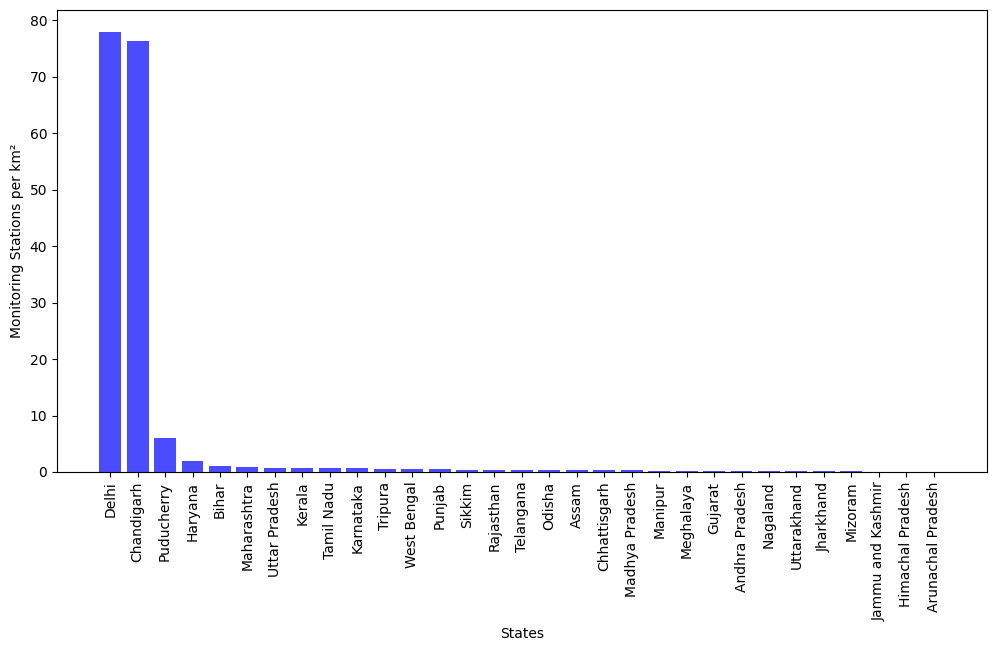

In [39]:
#5.2
df_stations = pd.read_csv("Data.csv")
df_population = pd.read_csv("State_data.csv")
df_stations.columns = df_stations.columns.str.lower()
df_population.columns = df_population.columns.str.lower()

#to count the number of monitoring stations we will create a new dataframe with the count method  with the number of monitoring stations in it.

stations_per_state = df_stations.groupby("state")["state"].count().reset_index(name="num_stations")
display(stations_per_state)
#merge the number of monitoring stations with the states on the inner method 
stations_density_data = pd.merge(stations_per_state, df_population, on="state", how="inner")

#to compute monitoring stations per km2 means total monitoring stations in that state divided by that area.
stations_density_data["stations_per_km2"] = stations_density_data["num_stations"] / stations_density_data["area (km2)"]

#return the state with highest values of ratio.
most_dense_state = stations_density_data.loc[stations_density_data["stations_per_km2"].idxmax(), "state"]

#return the states in a sorted manner.
stations_density_data = stations_density_data.sort_values(by="stations_per_km2", ascending=False)

plt.figure(figsize=(12, 6))
#given the rotation because it becomes congested due to long names of states.
plt.xticks(rotation=90)

plt.xlabel('States')
plt.ylabel('Monitoring Stations per km²')
plt.bar(stations_density_data["state"], stations_density_data["stations_per_km2"], color="blue", alpha=0.7)

Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.


In [40]:
#5.3
#as usual standardizing the column names
df_stations.columns = df_stations.columns.str.lower()
df_population.columns = df_population.columns.str.lower()
#converting the column values of timestamp from str to timestamp.
df_stations["timestamp"] = pd.to_datetime(df_stations["timestamp"])
df_2021 = df_stations[df_stations["timestamp"].dt.year == 2021]

#extracting only the values of maharashtra and madhya pradesh.
df_filtered = df_2021[df_2021["state"].isin(["Maharashtra", "Madhya Pradesh"])]
display(df_filtered)

#isin will only return the values of conditions specified.
#we have extracted the values from the dataframe only of the timestamp with 2021.


#grouping the dataframe by the states and calculating the mean values of the pm2.5 levels.

df_average_pm=df_filtered.groupby('state')['pm2.5'].mean().reset_index()
display(df_average_pm)
#counting the number of values to provide a possible explanation for the diiference in the pm values.

df_average_pm_values=df_filtered.groupby('state')['pm2.5'].count().reset_index()
display(df_average_pm_values)
df_average_pm_sum=df_filtered.groupby('state')['pm2.5'].sum().reset_index()
display(df_average_pm_sum)

,timestamp,station,pm2.5,pm10,address,city,latitude,longitude,state
819624,2021-01-01,"Airoli, Navi Mumbai - MPCB",NaN,NaN,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
819626,2021-01-01,"Alandi, Pune - IITM",79.189231,127.116308,System Of Air Quality And weather Forecasting ...,Pune,18.675076,73.892743,Maharashtra
819629,2021-01-01,"Ambazari, Nagpur - MPCB",NaN,NaN,"Beside SBI VRC Opp. to NPTI South, Ambazari Ro...",Nagpur,21.121801,79.049520,Maharashtra
819648,2021-01-01,"Bandhavgar Colony, Satna - Birla Cement",27.814526,98.974063,"Birla Corporation Limited, Unit- Satna Cement ...",Satna,24.584344,80.854941,Madhya Pradesh
819649,2021-01-01,"Bandra Kurla Complex, Mumbai - IITM",194.987368,228.700211,System Of Air Quality and Weather Forecasting ...,Mumbai,19.053536,72.846430,Maharashtra
...,...,...,...,...,...,...,...,...,...
1024361,2021-12-31,"Vasai West, Mumbai - MPCB",NaN,204.853763,"Fire Brigade Station, Vasai Grass Road, Navgha...",Mumbai,19.383200,72.820400,Maharashtra
1024371,2021-12-31,"Vijay Nagar Scheme-78, Indore - Glenmark",NaN,NaN,"Govt. Institute of Fine Arts Indore, Scheme Nu...",Indore,22.767260,75.887100,Madhya Pradesh
1024373,2021-12-31,"Vijay Nagar, Sangli - MPCB",NaN,NaN,"Collector Office Premises, Near District Court...",Sangli,16.503800,74.362300,Maharashtra
1024375,2021-12-31,"Vile Parle West, Mumbai - MPCB",94.205745,200.134000,"CAAQMS- Maharashtra Pollution Control Board, U...",Mumbai,19.108610,72.836220,Maharashtra


,state,pm2.5
0,Madhya Pradesh,47.095952
1,Maharashtra,46.440044


,state,pm2.5
0,Madhya Pradesh,5360
1,Maharashtra,12385


,state,pm2.5
0,Madhya Pradesh,252434.301817
1,Maharashtra,575159.947059


We see that the average pm2.5 levels between maharshtra and madhya pradesh are higher for madhya pradesh.
However the population count is more in maharshtra than madhya pradesh.
The reason for the difference in this average values maybe due to several reasons.
The locations of monitoring stations, number of readings, the differneces in industrial pollution, other factors like number of vehicles.
We see that there is a difference in the number of readings taken.
This difference is mainly due to the the limitation of data availability.


Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.


In [41]:
#6.1
#to compute the average pm levels between these two categories seperate them in two dataframes and then merge them on the state column.
#The column names were not matching so had to lowercse them.
#name suitably both files for context
funding_file= pd.read_csv("NCAP_Funding.csv")  
pm25_levelfile = pd.read_csv("Data.csv")  


funding_file.columns = funding_file.columns.str.lower()
pm25_levelfile.columns = pm25_levelfile.columns.str.lower()


funded_states = set(funding_file['state'])
#the lambda function will check everytime if x is in the set of funded states and will label it as funded or not funded.
pm25_levelfile['NCAP_Funded'] = pm25_levelfile['state'].apply(lambda x: 'Funded' if x in funded_states else 'Not Funded')
avg_pm25 = pm25_levelfile.groupby('NCAP_Funded')['pm2.5'].mean()
display(avg_pm25)









NCAP_Funded
Funded        58.629534
Not Funded    60.768363
Name: pm2.5, dtype: float64

As we can note the staes which did not receive any funding in the year 2021 have higher average pm level than those which did receive some funding but they do not differ by any more large values.

4.2

C:\Users\yashs\AppData\Local\Temp\ipykernel_8272\3259568933.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25_assam["Year"] = df_pm25_assam["Timestamp"].dt.year


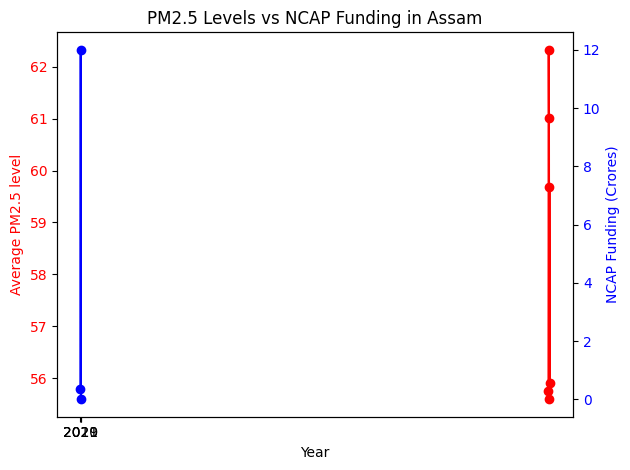

In [42]:
#6.2
df_funding = pd.read_csv('NCAP_Funding.csv')
df_pm25 = pd.read_csv('Data.csv')

#this values in columns are strings else they will sum up as string when we want to add them so do convert it to numeric,errors will be coerced to NaN.
df_funding["Amount released during FY 2019-20"] = pd.to_numeric(df_funding["Amount released during FY 2019-20"], errors="coerce")
df_funding["Amount released during FY 2020-21"] = pd.to_numeric(df_funding["Amount released during FY 2020-21"], errors="coerce")
df_funding["Amount released during FY 2021-22"] = pd.to_numeric(df_funding["Amount released during FY 2021-22"], errors="coerce")

#only funding data for assam is required.
df_funding_assam = df_funding[df_funding["State"] == "Assam"]
funding_by_year = {
    "2019": df_funding_assam["Amount released during FY 2019-20"].sum(),
    "2020": df_funding_assam["Amount released during FY 2020-21"].sum(),
    "2021": df_funding_assam["Amount released during FY 2021-22"].sum()
}

#timestamp of the pm2.5 levels is converted to datetime format.
df_pm25["Timestamp"] = pd.to_datetime(df_pm25["Timestamp"], errors="coerce")
df_pm25_assam = df_pm25[df_pm25["state"] == "Assam"]

#avg values of pm level if calculated in this lines,
df_pm25_assam["Year"] = df_pm25_assam["Timestamp"].dt.year
pm25_by_year = df_pm25_assam.groupby("Year")["PM2.5"].mean()

#use subplot to plot the graph.
fig, ax1 = plt.subplots()

#first y axis is for pm 2.5 level
ax1.set_xlabel("Year")
ax1.set_ylabel("Average PM2.5 level", color="red")
ax1.plot(pm25_by_year.index, pm25_by_year.values,marker='o',
          linestyle="-", color="red", label="PM2.5 Levels")
ax1.tick_params(axis="y", labelcolor="red")

#second y axis is for funding.
ax2 = ax1.twinx()
ax2.set_ylabel("NCAP Funding (Crores)", color="b")
ax2.plot(funding_by_year.keys(), funding_by_year.values(),marker='o' ,linestyle="-", color="b", label="NCAP Funding")
ax2.tick_params(axis="y", labelcolor="b")

#give the title to the graph.
plt.title("PM2.5 Levels vs NCAP Funding in Assam")
fig.tight_layout()
plt.show()
#the marker is given so it can highlight the points on the graph.

Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


,state,Funding
0,Andhra Pradesh,7.76
1,Assam,0.00
2,Bihar,11.60
3,Chandigarh,17.89
4,Chhattisgarh,0.00
5,Delhi,0.00
6,Gujarat,0.00
7,Himachal Pradesh,5.56
8,Jammu & Kashmir,8.01
9,Jharkhand,0.00


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Assam'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Chhattisgarh'),
  Text(5, 0, 'Delhi'),
  Text(6, 0, 'Gujarat'),
  Text(7, 0, 'Himachal Pradesh'),
  Text(8, 0, 'Jammu & Kashmir'),
  Text(9, 0, 'Jharkhand'),
  Text(10, 0, 'Karnataka'),
  Text(11, 0, 'Madhya Pradesh'),
  Text(12, 0, 'Maharashtra'),
  Text(13, 0, 'Meghalaya'),
  Text(14, 0, 'Nagaland'),
  Text(15, 0, 'Odisha'),
  Text(16, 0, 'Punjab'),
  Text(17, 0, 'Rajasthan'),
  Text(18, 0, 'Tamil Nadu'),
  Text(19, 0, 'Telangana'),
  Text(20, 0, 'Uttar Pradesh'),
  Text(21, 0, 'Uttarakhand'),
  Text(22, 0, 'West Bengal')])

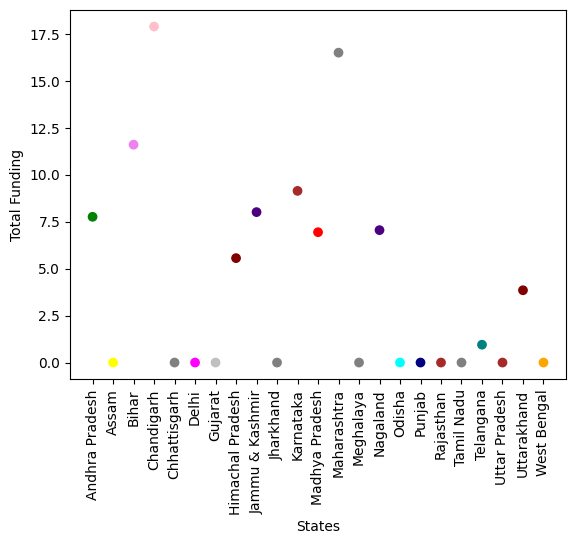

In [43]:
#6.3
#funding_file is our file of ncap fundings
#pm25_levelfile is the file of pm2.5 levels
#we have to merge the dataframes on the state column.
#the new column contains the total funding.
#the column names were not matching so had to lowercse them.
#the funding values are not numeric and is raising errors we would convert the columns to numeric values.\
funding_file= pd.read_csv("NCAP_Funding.csv")

funding_file["Amount released during FY 2019-20"] = pd.to_numeric(funding_file["Amount released during FY 2019-20"], errors="coerce")
funding_file["Amount released during FY 2020-21"] = pd.to_numeric(funding_file["Amount released during FY 2020-21"], errors="coerce")
funding_file["Amount released during FY 2021-22"] = pd.to_numeric(funding_file["Amount released during FY 2021-22"], errors="coerce")
    
funding_file['Funding'] = funding_file['Amount released during FY 2019-20'] + funding_file['Amount released during FY 2020-21'] + funding_file['Amount released during FY 2021-22']
#displayed it for some context.

pm25_levelfile = pd.read_csv("Data.csv")
funding_file=funding_file.rename(columns={'State':'state'})
states_with_funding=funding_file.groupby('state')['Funding'].sum().reset_index()
display(states_with_funding)
#now main task is done just to plot the graph now.

cl=['red','blue','green','yellow','orange','purple','pink','brown','black','grey','cyan','magenta','violet','indigo','maroon','olive','navy','teal','aqua','lime','silver','gray','red','blue','green','yellow','orange','purple','pink','brown','black','grey','cyan','magenta','violet','indigo','maroon','olive','navy','teal','aqua','lime','silver','gray']
np.array(cl)
plt.scatter(states_with_funding['state'],states_with_funding['Funding'],color=np.random.choice(cl, len(states_with_funding)))
plt.xlabel('States')
plt.ylabel('Total Funding')


plt.xticks(rotation=90)

In [44]:

df = pd.read_csv('Data.csv')
display(df)


df1 = pd.read_csv('State_data.csv')
display(df1)


df2 = pd.read_csv('NCAP_Funding.csv')
display(df2)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252
5,Tamil Nadu,72147030,130058
6,Rajasthan,68548437,342239
7,Karnataka,61095297,191791
8,Gujarat,60439692,196024
9,Andhra Pradesh,49577103,162975


,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91
...,...,...,...,...,...,...,...,...
112,113,West Bengal,Kolkata,6,-,-,6.00,19
113,114,West Bengal,Howrah,-,5,-,5.00,19
114,115,West Bengal,Haldia,-,3,-,3.00,19
115,116,West Bengal,Durgapur,-,3,-,3.00,19


In [64]:

df1 = pd.read_csv("Data.csv")
df1["Timestamp"] = pd.to_datetime(df1["Timestamp"])
state_data = pd.read_csv("State_data.csv")
data_of_2023 = df1[df1["Timestamp"].dt.year == 2023]
most_polluted_city = data_of_2023.groupby("city")["PM2.5"].mean().idxmax()

pm_2_5_mask = data_of_2023["PM2.5"] > 300
city_mask = data_of_2023["city"] == most_polluted_city
filtered = data_of_2023[pm_2_5_mask & city_mask]
days_polluted = len(filtered)
total_days = len(data_of_2023[city_mask].dropna(subset = ["PM2.5"]))

print(f"Percentage of days hazardous levels of PM2.5 levels: {days_polluted / total_days * 100:.2f}%")


Percentage of days hazardous levels of PM2.5 levels: 23.08%


Year: 2018
Average PM2.5 levels during Diwali (October-November): 167.43
Average PM2.5 levels during New Year: 305.08
Average PM2.5 levels during the rest of the year: 100.39

Year: 2019
Average PM2.5 levels during Diwali (October-November): 162.83
Average PM2.5 levels during New Year: 287.60
Average PM2.5 levels during the rest of the year: 96.86

Year: 2020
Average PM2.5 levels during Diwali (October-November): 172.16
Average PM2.5 levels during New Year: 369.15
Average PM2.5 levels during the rest of the year: 78.97

Year: 2021
Average PM2.5 levels during Diwali (October-November): 155.41
Average PM2.5 levels during New Year: 390.92
Average PM2.5 levels during the rest of the year: 93.93

Year: 2022
Average PM2.5 levels during Diwali (October-November): 143.19
Average PM2.5 levels during New Year: 238.04
Average PM2.5 levels during the rest of the year: 90.00

Year: 2023
Average PM2.5 levels during Diwali (October-November): 171.41
Average PM2.5 levels during New Year: 140.18
Averag

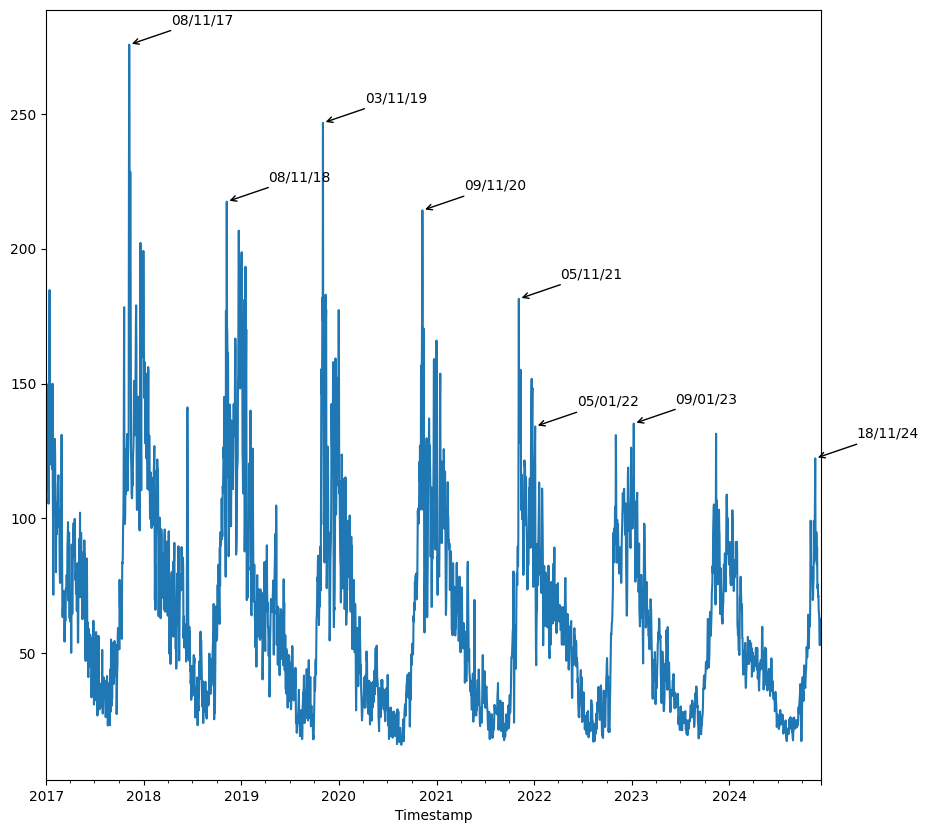

In the above graph, the maximum PM2.5 levels for each year are marked with an arrow and annotated with the date. We can observe that these dates are almost always in the Diwali period or around New Year.


In [67]:
import datetime

def get_mean_pm25(df):
    return df.groupby("state")["PM2.5"].mean()

def compare_levels(df, year):
    year_data = df[df["Timestamp"].dt.year == year]

    diwali_mask = year_data["Timestamp"].dt.month.isin((10, 11))    
    new_year_mask = year_data["Timestamp"].dt.date == datetime.date(year, 1, 1)
    regular_mask = ~(diwali_mask | new_year_mask)

    regular_avg = get_mean_pm25(year_data[regular_mask])
    diwali_avg = get_mean_pm25(year_data[diwali_mask])
    new_year_avg = get_mean_pm25(year_data[new_year_mask])
    return diwali_avg["Delhi"], new_year_avg["Delhi"], regular_avg["Delhi"]

for year in range(2018, 2025):
    diwali, new_year, regular = compare_levels(df1, year)
    print(f"Year: {year}")
    print(f"Average PM2.5 levels during Diwali (October-November): {diwali:.2f}")
    print(f"Average PM2.5 levels during New Year: {new_year:.2f}")
    print(f"Average PM2.5 levels during the rest of the year: {regular:.2f}\n")

dates = df1.groupby("Timestamp")["PM2.5"].mean()
yearwise_spikes = dates.groupby(dates.index.year).idxmax()

ax = dates.plot(figsize = (10, 10))

for timestamp in yearwise_spikes:
    ax.annotate(
        f"{timestamp.strftime("%d/%m/%y")}",
        (timestamp, dates[timestamp]),
        xytext = (30, 15),
        textcoords = 'offset points',
        arrowprops = dict(arrowstyle = '->')
    )

plt.show()
print("In the above graph, the maximum PM2.5 levels for each year are marked with an arrow and annotated with the date. We can observe that these dates are almost always in the Diwali period or around New Year.")

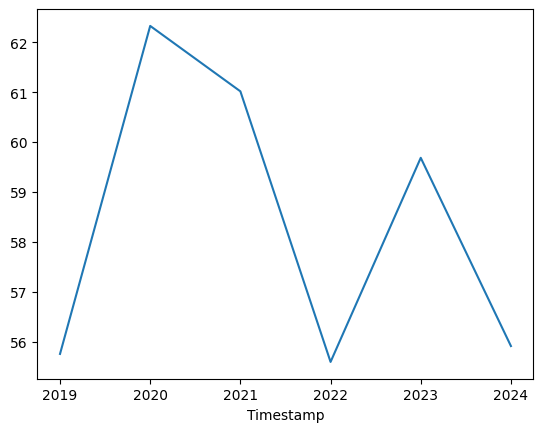

The most funded state in 2020 was Assam. The average PM2.5 levels for Andhra Pradesh had been decreasing since 2017 and had already improved a lot from 2017 to 2020. However, from 2020 to 2023, the average PM2.5 levels increased. This shows that the funds might not have been used properly to improve the air quality.


In [68]:
def get_funding(fy):
    return f"Amount released during FY 20{fy}"

ncap_funding = pd.read_csv("NCAP_Funding.csv")
ncap_funding.loc[ncap_funding["State"] == "Jammu & Kashmir", "State"] = "Jammu and Kashmir"

for i in (19, 20, 21):
    col = get_funding(f"{i}-{i+1}")
    ncap_funding[col] = pd.to_numeric(ncap_funding[col], errors = 'coerce')

ncap_funding


ncap_funding=pd.read_csv("NCAP_Funding.csv")
most_funded_state = ncap_funding.groupby("State")[get_funding("20-21")].sum().idxmax()

yearly_pollution = df1.groupby([df1["Timestamp"].dt.year, "state"])["PM2.5"].mean()

yearly_pollution.loc[:, most_funded_state].plot()
plt.show()

print(f"The most funded state in 2020 was {most_funded_state}. The average PM2.5 levels for Andhra Pradesh had been decreasing since 2017 and had already improved a lot from 2017 to 2020. However, from 2020 to 2023, the average PM2.5 levels increased. This shows that the funds might not have been used properly to improve the air quality.")
    
    

    

In [69]:
import folium

m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

unique_stations = df1.drop_duplicates(subset = ["station"])
unique_stations = unique_stations.dropna(subset = ["latitude", "longitude"])

for _, row in unique_stations.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup = f"{row['station']}, {row['state']}").add_to(m)

m